In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from pmdarima import auto_arima

In [7]:
# Run the stored data from the Data_Preparation.ipynb
%run ..//Data_Preparation.ipynb

Data types in 'indu' dataframe:
Time       datetime64[ns]
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
dtype: object

Data types in 'cons' dataframe:
Time        datetime64[ns]
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
cons_Q4            float64
cons_Q5            float64
cons_Q6            float64
cons_Q7            float64
cons_Q8            float64
cons_Q9            float64
cons_Q10           float64
cons_Q11           float64
cons_Q12           float64
dtype: object

Data types in 'gdp' dataframe:
Time     datetime64[ns]
Value           float64
dtype: object
indu_Q1           float64
indu_Q2           float64
indu_Q3           float64
indu_Q4           float64
indu_Q5           float64
indu_Q7           float64
Time       datetime64[ns]
dtype: object
cons_Q1            float64
cons_Q2            float64
cons_Q3            float64
con

In [8]:
#Using the period 1990-2015 for training and 2016-2020 for testing
indu_train = indu[(indu['Time'] >= '1990-01-01') & (indu['Time'] < '2016-01-01')]
cons_train = cons[(cons['Time'] >= '1990-01-01') & (cons['Time'] < '2016-01-01')]
gdp_train = gdp[(gdp['Time'] >= '1990-01-01') & (gdp['Time'] < '2016-01-01')]

indu_test = indu[(indu['Time'] >= '2016-01-01') & (indu['Time'] < '2020-01-01')]
cons_test = cons[(cons['Time'] >= '2016-01-01') & (cons['Time'] < '2020-01-01')]
gdp_test = gdp[(gdp['Time'] >= '2016-01-01') & (gdp['Time'] < '2020-01-01')]

In [9]:
print(gdp_train)
print(cons_train)
print(indu_train)


          Time  Value
0   1990-01-01  210.2
1   1990-04-01  218.1
2   1990-07-01  209.5
3   1990-10-01  217.8
4   1991-01-01  220.2
..         ...    ...
99  2014-10-01  512.7
100 2015-01-01  495.9
101 2015-04-01  513.5
102 2015-07-01  505.9
103 2015-10-01  521.1

[104 rows x 2 columns]
      cons_Q1    cons_Q2    cons_Q3    cons_Q4    cons_Q5    cons_Q6  \
0   -3.166667   3.333333  -9.333333  -4.500000  -5.333333  -5.666667   
1   -0.666667   3.333333 -13.833333  -6.833333  -8.833333  -6.666667   
2   -0.500000   3.833333 -21.666667 -14.666667 -11.500000  -7.500000   
3   -2.666667   1.833333 -16.833333 -11.000000 -14.833333  -8.666667   
4   -1.666667   6.500000   2.000000  -1.000000 -23.666667 -15.833333   
..        ...        ...        ...        ...        ...        ...   
99   4.400000  13.666667  11.500000  14.666667  -5.433333  19.133333   
100  6.033333  14.300000  15.333333  19.933333 -17.733333  10.700000   
101  5.133333  15.133333  20.133333  23.266667  -8.433333  20.06

In [10]:
# Resetting the index
gdp_train.reset_index(drop=True, inplace=True)
indu_train.reset_index(drop=True, inplace=True)
cons_train.reset_index(drop=True, inplace=True)

# Combine the explanatory variables into a single DataFrame
exog_train = pd.concat([indu_train, cons_train], axis=1)
exog_test = pd.concat([indu_test, cons_test], axis=1)

# Remove the Time column
exog_train.drop('Time', axis=1, inplace=True)

# Initialize an empty list to store forecast values
forecast_values = []

i = 0
while i < len(indu_test):  # Continue looping until all observations are used
    print(f"Iteration {i}:")
    # Fit auto_arima function to the data
    arimax_model = auto_arima(gdp_train['Value'], exogenous=exog_train,
                              start_p=1, start_q=1,
                              max_p=3, max_q=3,
                              seasonal=False,
                              trace=False, error_action='ignore', suppress_warnings=True, stepwise=True)

    # Forecast the next value
    forecast = arimax_model.predict(n_periods=1, exogenous=exog_test.iloc[[i]])

    print("Forecast:", forecast)

    # Append the forecasted value to the list
    forecast_values.append(forecast.iloc[0])

    # Assign the last observation from the test set to the training set
    gdp_train.loc[len(gdp_train)] = gdp_test.iloc[i]
    indu_train.loc[len(indu_train)] = indu_test.iloc[i]
    cons_train.loc[len(cons_train)] = cons_test.iloc[i]

    i += 1  # Increment the counter

Iteration 0:
Forecast: 104    505.195289
dtype: float64
Iteration 1:
Forecast: 105    524.368711
dtype: float64
Iteration 2:
Forecast: 106    525.542313
dtype: float64
Iteration 3:
Forecast: 107    534.717827
dtype: float64
Iteration 4:
Forecast: 108    534.602281
dtype: float64
Iteration 5:
Forecast: 109    549.8214
dtype: float64
Iteration 6:
Forecast: 110    544.430071
dtype: float64
Iteration 7:
Forecast: 111    561.556676
dtype: float64
Iteration 8:
Forecast: 112    548.445761
dtype: float64
Iteration 9:
Forecast: 113    560.215453
dtype: float64
Iteration 10:
Forecast: 114    551.598145
dtype: float64
Iteration 11:
Forecast: 115    579.804152
dtype: float64
Iteration 12:
Forecast: 116    563.749398
dtype: float64
Iteration 13:
Forecast: 117    579.580296
dtype: float64
Iteration 14:
Forecast: 118    568.041238
dtype: float64
Iteration 15:
Forecast: 119    596.713859
dtype: float64


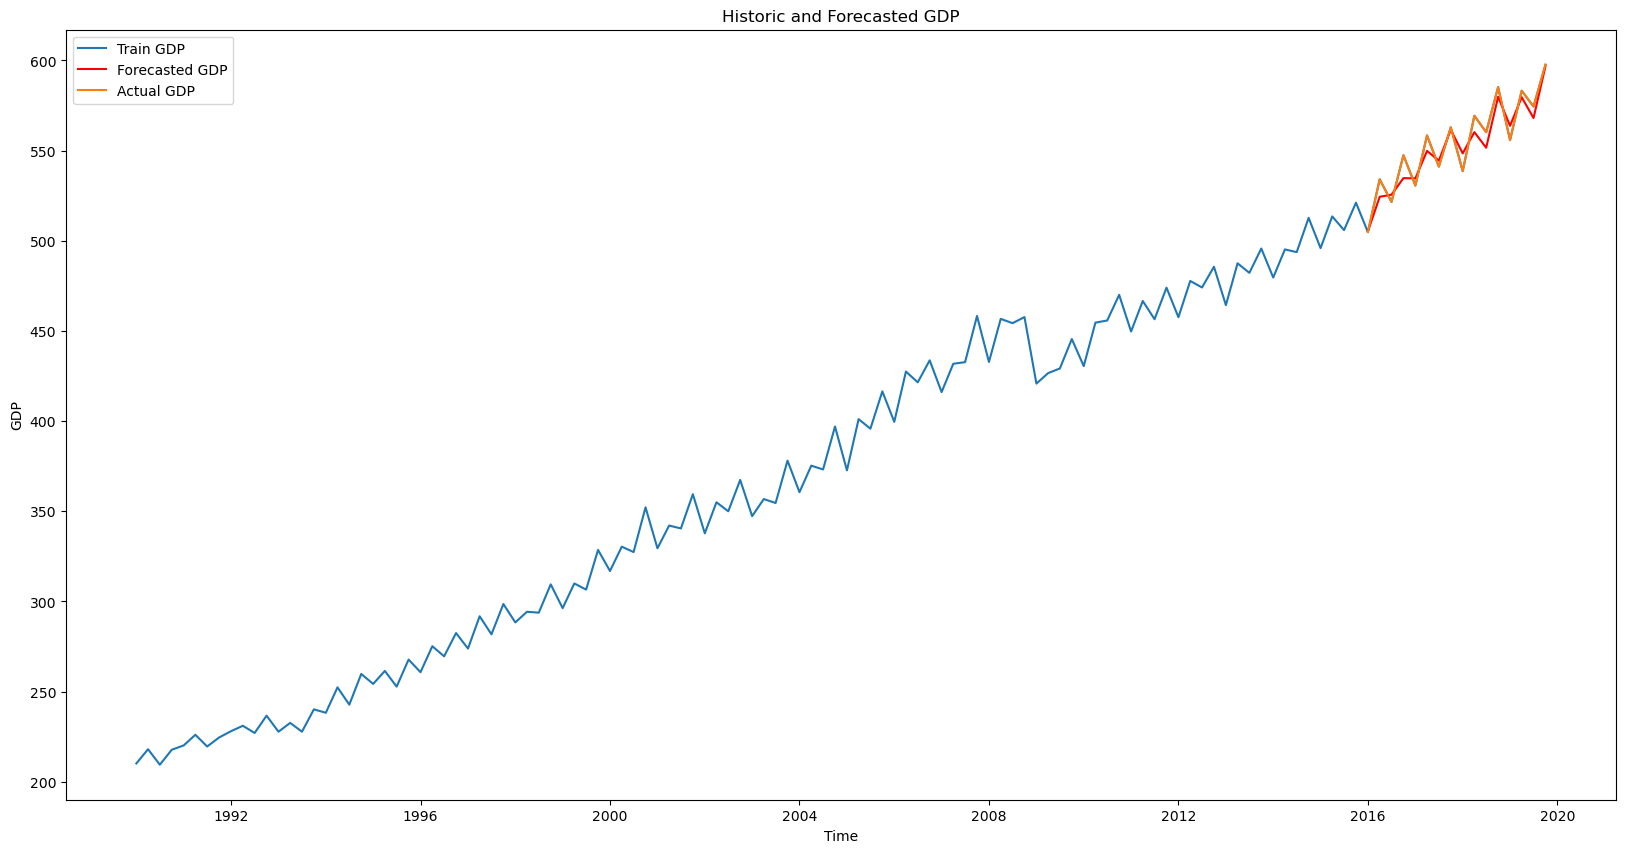

In [11]:
# Plotting historic GDP and forecasted GDP
plt.figure(figsize=(20,10))
plt.plot(gdp_train['Time'], gdp_train['Value'], label='Train GDP')
plt.plot(gdp_test['Time'], forecast_values, color='red', label='Forecasted GDP')
plt.plot(gdp_test['Time'], gdp_test['Value'], label='Actual GDP')

# Set the title and labels
plt.title('Historic and Forecasted GDP')
plt.xlabel('Time')
plt.ylabel('GDP')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [12]:
#Comparing the forecasted values with the actual values trough RMSE
# Calculate the RMSE
rmse_value = rmse(gdp_test['Value'], forecast_values)

# Print the RMSE
print("The RMSE is", rmse_value)

# The RMSE is 7. This is very low, which means that the model is a good fit for the data.

The RMSE is 6.958025756680841
